# Example usage

In this tutorial, we will demonstrate three core capabilities of the `seqwalk` package.

1. We will use the `seqwalk.design` module to design maximal orthogonal sequence libraries using the novel methods outlined in our preprint (coming soon!). 
2. We will use the `seqwalk.analysis` module to analyze orthogonal sequence libraries. 
3. We will use the `seqwalk.io` module to load "off-the-shelf" orthogonal sequence libraries from previous publications.

In [1]:
from seqwalk import io
from seqwalk import design
from seqwalk import analysis

import seaborn as sns

## Designing sequences using seqwalk

The algorithms presented in our preprint are the first that allow for the design of maximally orthogonal and maximally sized orthogonal sequence libraries. The `seqwalk` package implements these algorithms in two design functions: a `max_size` function which designs maximally sized libraries for a given set of constraints, and a `max_orthogonality` function, which designs a library of desired size, with the strictest possible orthogonality constraints. 

## Maximally-sized orthogonal library design

To design a maximally-sized orthogonal sequence library, we must specify a desired sequence length, and an orthogonality constraint in the form of an SSM k-value. This value is the smallest $k$ for which no substring of length $k$ appears twice in the library. For example, SSM k=3 means that no length 3 string can repeat multiple times in a library.

Optionally, one can specify the prevention of reverse complementary sequences, GC content limits, allowable alphabet, and specific prevented patterns. By default, reverse complementary sequences are allowed, there are no GC content constraints, a 3 letter (A/C/T, no G) code is used and any 4N (AAAA, CCCC, ...) sequence is prevented. To see in detail how to specify each these constraints, see the API reference for `seqwalk.design.max_orthogonality()`

Suppose we want to design the maximal set of 25nt sequences that satisfy SSM for k=12, with a 4 letter alphabet, without considering reverse complementary sequences, and no GC or pattern constraints. **We need to write only a single line of code, which executes in <1 minute!**

(Note that the Python implementation is slightly slower than the Julia implementation, which can be found in the supplement of the preprint.)

In [2]:
%%time

huge_25mer_library = design.max_size(25, 12, alphabet="ACGT", prevented_patterns=[])

print("The 25mer library has %d sequences" % (len(huge_25mer_library)))

The 25mer library has 1198372 sequences
CPU times: user 30.6 s, sys: 464 ms, total: 31 s
Wall time: 31.5 s


## Maximally orthogonal library design

To design a library of minimum size with maximal orthogonality, we instead need to specify a minimum library size and desired sequence length. The same optional arguments apply, with the addition of an optional `k_init` parameter which serves as an initial lower-bound for the lowest SSM k for which a library of the desired size can be designed.


Suppose we need only 200 barcodes with length 25, with prevented reverse complements, and a 4 letter alphabet, and between 10 and 15 G/C bases, and no 4N homopolymers. We can use the following design code:

In [3]:
small_25mer_library = design.max_orthogonality(200, 25, 
                                               alphabet="ACGT", prevented_patterns=[])

Number of sequences: 204
SSM k value: 6


Note that the identified minimum k-value is half that used in the large library design problem. Based on sequence symmetry, this library will have significantly less crosstalk than the large 25mer library.

## Quality control using pairwise comparisons

While `seqwalk.design` uses a graph-theoretic representation of sequence symmetry constraints for efficient orthogonal sequence design, the `analysis` module supports pairwise comparisons of sequences in a library for quality control. For example, you can compare the Hamming distances of each pair of sequences in a library as a form of additional quality control. Note that these functions can be applied to any set of sequences, not just those designed using `seqwalk`.

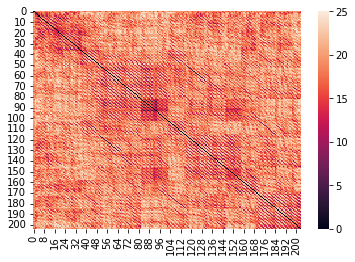

In [4]:
h_crosstalk = analysis.hamming_matrix(small_25mer_library)

p = sns.heatmap(h_crosstalk)

## Importing "off-the-shelf" sequences from previous publications

If you would like to use orthogonal sequence libraries from previous experimental publications, you can use the `io` module. Simply use the `load_library` function with the appropriate identifier tag. The following libraries are included:

| identifier | # of seqs | seq length | original use case | ref |
|------------|-----------|------------|-------------------|-----|
| `kishi2018` | 50 | 9nt | PER primers | [Kishi et al, 2018](https://www.nature.com/articles/nchem.2872) |

In [5]:
PER_primers = io.load_library("kishi2018")

print("Number of PER primers: %d" % len(PER_primers))

Number of PER primers: 50
